In [9]:
# Predicting Fuel Efficiency Assignment
# DSC 550
# Week 4
# Data Mining Assignment Week 4
# David Berberena
# 4/7/2024

# Program Start

## 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [39]:
# For this assignment, multiple libraries need to be imported. The following libraries are necessary for the assignment: 

# 1. Pandas - reads the dataset into the data frame object for data manipulation
# 2. Numpy - allows numerical computation such as np.sqrt for the RMSE statistic further down the program
# 3. Matplotlib - provides plotting capabilities for variable relationships using scatter plots
# 4. sklearn.model_selection - Sci-kitlearn's model_selection module is needed to access the train_test_split() function, 
# which is responsible for creating a training and test dataset out of the original for regression modeling purposes
# 5. sklearn.linear_model - Sci-kitlearn's linear_model module is needed to access the LinearRegression() function, which 
# creates an ordinary linear regression model with the training dataset 
# 6. sklearn.metrics - Sci-kitlearn's metrics module is needed to access the specific statistics needed for regression 
# analysis (R-Squared, RMSE, and MAE)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
# The read_csv() function in Pandas will transform the CSV file into a Pandas data frame.

auto = pd.read_csv('auto-mpg.csv')

# The head() function is used to view the top five dataset observations to see if the data was imported correctly.

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 2. Begin by prepping the data for modeling:

### A. Remove the car name column.

In [12]:
# The drop() function is used to remove either rows or columns, with the axis argument set to 1 specifying that the 
# 'car name' variable is a column.

auto = auto.drop('car name', axis = 1)

# The head() function is written to see the changes the preceding code has made to the dataset.

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### B. The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [13]:
# As I don't know why the horsepower column's dtype is anything other than int, I am using the dtypes attribute of the 
# dataset to see what dtype the horsepower variable actually has.

auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [14]:
# With the horsepower variable being a Pandas object series, using the unique() function allows me to see any value that 
# would make this column an object series by capturing every unique valeu within the column regardless of type. These 
# values are then printed to see which values are the issue we need to tackle.

unique_values = auto['horsepower'].unique()
print(unique_values)

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [15]:
# Now that the '?' value has been revealed as a unique value in the horsepower variable, I will use the replace() function 
# to turn the '?' values into NaN values to be filled with the mean horsepower value using the fillna() function and then 
# convert the variable's values back into the correct integer dtype.

auto['horsepower'] = auto['horsepower'].replace('?', np.nan)

auto['horsepower'] = auto['horsepower'].astype(float)

auto_horsepower_mean = auto['horsepower'].mean()
auto['horsepower'].fillna(auto_horsepower_mean, inplace=True)

# The head() function is written to see the changes the preceding code has made to the dataset.

auto['horsepower'] = auto['horsepower'].astype(int)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### C. Create dummy variables for the origin column.

In [16]:
# With the origin column containing values of 1, 2, and 3, I chose to use the map() function to attach labels to each value 
# that reflect the three top vehicle-producing regions (USA, Europe, and Asia). After that, the getdummies() function in 
# Pandas is used to create the dummy variables using the newly crafted labels.

auto['origin'] = auto['origin'].map({1: 'american_car', 2: 'european_car', 3: 'asian_car'})
auto = pd.get_dummies(auto, columns=['origin'], prefix='', prefix_sep='')

# The head() function is written to see the changes the preceding code has made to the dataset.

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,american_car,asian_car,european_car
0,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,True,False,False


In [17]:
# The output of the dummy variables was not as I expected it to be, as the returned column values are Boolean expressions. 
# To change these expressions into the 1 and 0 output I was expecting, I will change the dtype of each dummy variable 
# column with the astype() function.

auto['american_car'] = auto['american_car'].astype(int)
auto['european_car'] = auto['european_car'].astype(int)
auto['asian_car'] = auto['asian_car'].astype(int)

# The head() function is written to see the changes the preceding code has made to the dataset.

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,american_car,asian_car,european_car
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


## 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [18]:
# The creation of a correlation matrix in Python is easily accomplished using the corr() function.

auto_correlation_matrix = auto.corr()

# The correlation matix is displayed below.

auto_correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,american_car,asian_car,european_car
mpg,1.000000,-0.775396,-0.804203,-0.771543,-0.831741,0.420289,0.579267,-0.568192,0.442174,0.259022
cylinders,-0.775396,1.000000,0.950721,0.839061,0.896017,-0.505419,-0.348746,0.604351,-0.396479,-0.352861
displacement,-0.804203,0.950721,1.000000,0.893760,0.932824,-0.543684,-0.370164,0.651407,-0.433505,-0.373886
horsepower,-0.771543,0.839061,0.893760,1.000000,0.860676,-0.684376,-0.411750,0.486067,-0.321232,-0.281334
weight,-0.831741,0.896017,0.932824,0.860676,1.000000,-0.417457,-0.306564,0.598398,-0.440817,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.684376,-0.417457,1.000000,0.288137,-0.250806,0.109144,0.204473
model year,0.579267,-0.348746,-0.370164,-0.411750,-0.306564,0.288137,1.000000,-0.139883,0.193101,-0.024489
american_car,-0.568192,0.604351,0.651407,0.486067,0.598398,-0.250806,-0.139883,1.000000,-0.643317,-0.597198
asian_car,0.442174,-0.396479,-0.433505,-0.321232,-0.440817,0.109144,0.193101,-0.643317,1.000000,-0.229895
european_car,0.259022,-0.352861,-0.373886,-0.281334,-0.298843,0.204473,-0.024489,-0.597198,-0.229895,1.000000


In [19]:
# High correlation is typically defined as being valued at +-0.8, so the values that classify as being highly correlated to 
# the mpg variable are cylinders (-0.77), displacement (-0.8), horsepower (-0.77), and weight (the most highly correlated 
# variable with a coefficient of -0.83). All of these variables are negatively correlated, which means that with an 
# increase in mpg, all of these variables decrease. If mpg decreases, then all of these variables would increase. 

## 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

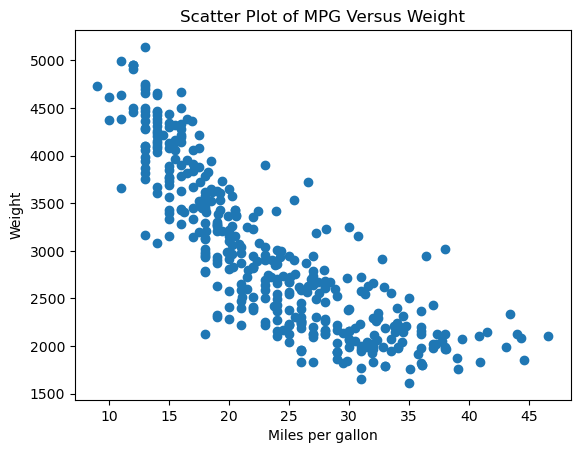

In [23]:
# To plot the mpg variable against the weight variable, I will be implementing Matplotlib's scatter() function to output a 
# scatter plot, which can confirm or go against the previously calculated correlation coefficient for these variables.

plt.scatter(auto['mpg'], auto['weight'])
plt.xlabel('Miles per gallon')
plt.ylabel('Weight')
plt.title('Scatter Plot of MPG Versus Weight')
plt.show()

In [ ]:
# The scatter plot visualization of the mpg and weight variables confirms the correlation coefficient's verdict of a highly 
# negative correlation between the two variables. For almost every observation, as mpg increases, weight decreases. The 
# scatter plot also suggests high collinearity between the two variables as well as the graphical output's data points are 
# centered around each other in such a way resembling a line. If I had added a line of best fit to this scatter plot, the 
# collinearity of the two variables would be better visualized as the observation would cluster around the best fit line.

## 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [38]:
# As our target variable is mpg, I cannot include it within the predictor training data as well, so I will create a 
# training dataset variable and remove that variable from the dataset with the drop() function.

auto_predictor_var = auto.drop('mpg', axis=1)
auto_outcome_var = auto['mpg']

# Sci-kitlearn's model_selection train_test_split() function is needed to split the data correctly, with the training and 
# test datasets needed in the function alongside the test_size argument set to 0.2, which tells us that the percentage of 
# data that will be turned into the test dataset is 20 percent. The random_state argument is important to specify as well 
# to make sure that my results are reproducible after altering the code so many times.

train_set_rows, test_set_rows, train_set_cols, test_set_cols = train_test_split(auto_predictor_var, 
                                                                        auto_outcome_var, test_size=0.2, random_state=123)

# To show that the datasets were split properly, I will print the dimensions of each dataset to see if the 80-20 split 
# worked as it should. 

print('Training set shape:', train_set_rows.shape)
print('Test set shape:', test_set_rows.shape)

Training set shape: (318, 9)
Test set shape: (80, 9)


## 6. Train an ordinary linear regression on the training data.

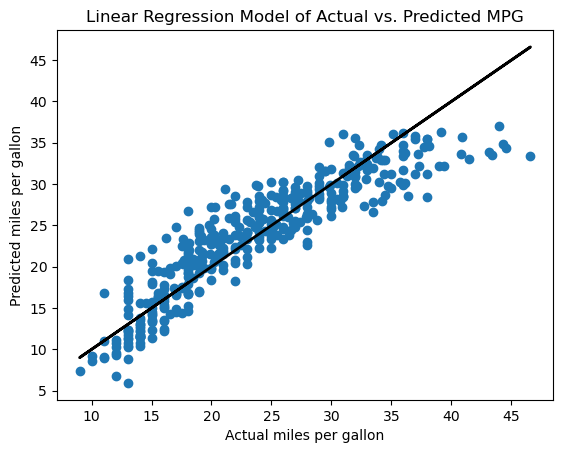

In [56]:
# Sci-kitlearn's linear_model LinearRegression() function is needed to construct the linear regression model from the 
# training dataset. 

ord_linear_model = LinearRegression()

ord_linear_model.fit(train_set_rows, train_set_cols)

# To visualize the created model, I accessed the predictor variables within the model and made predictions using the 
# predict attribute of the linear regression model. I then plotted the actual predictor variable values with the predicted 
# predictor variable values using a scatter plot while adding in a line of best fit to evaluate if the model is a good fit 
# for the data

predictions = ord_linear_model.predict(auto_predictor_var)

plt.scatter(auto_outcome_var, predictions)
plt.plot(auto_outcome_var, auto_outcome_var, color='black', linestyle='-', linewidth=2)
plt.xlabel('Actual miles per gallon')
plt.ylabel('Predicted miles per gallon')
plt.title('Linear Regression Model of Actual vs. Predicted MPG')
plt.show()

## 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [52]:
# All of these metrics are important to the validity and fit of the model to the data, so I trained the model again in this 
# block of code so I could create new predictions that fit better to the parameters of the metric functions obtained by 
# Sci-kitlearn's metrics module. The R-Squared value is found using the r2_score(), the RMSE value is calculated by taking 
# the square root of the mean_squared_error() function output, and the MAE statistic is realized by using the 
# mean_absolute_error() function. 

ord_linear_model = LinearRegression()

ord_linear_model.fit(train_set_rows, train_set_cols)

# This block of code is for the training dataset values that are printed at the end.

train_set_pred = ord_linear_model.predict(train_set_rows)

r2_train_value = r2_score(train_set_cols, train_set_pred)

rmse_train_value = np.sqrt(mean_squared_error(train_set_cols, train_set_pred))

mae_train_value = mean_absolute_error(train_set_cols, train_set_pred)

print('Training dataset statistical values')
print('R-squared:', r2_train_value)
print('Root Mean Squared Error:', rmse_train_value)
print('Mean Absolute Error:', mae_train_value)

Training dataset statistical values
R-squared: 0.8334872613271915
Root Mean Squared Error: 3.2011524552885997
Mean Absolute Error: 2.4385005602139045


In [53]:
# This block of code is for the test dataset values that are printed at the end.

test_set_pred = ord_linear_model.predict(test_set_rows)

r2_test_value = r2_score(test_set_cols, test_set_pred)

rmse_test_value = np.sqrt(mean_squared_error(test_set_cols, test_set_pred))

mae_test_value = mean_absolute_error(test_set_cols, test_set_pred)

print('Test dataset statistical values:')
print('R-squared:', r2_test_value)
print('Root Mean Squared Error:', rmse_test_value)
print('Mean Absolute Error:', mae_test_value)

Test dataset statistical values:
R-squared: 0.7724082627856227
Root Mean Squared Error: 3.6434083806335633
Mean Absolute Error: 2.8876615308984137


In [ ]:
# Looking at the results from these linear regression model statistic computations, here is what I see:

# R-Squared: As this metric measures the degree of best fit the model demonstrates for the data and is scaled from 0 to 1, 
# with 0 being the worst fit for the data and 1 being a perfect fit, the values of 0.83 for the training data and 0.77 for 
# the test data show that the model is a good fit for the data. 

# Root Mean Squared Error: 3.2 and 3.64 for the training and test data respectively is relatively good, as low numbers 
# translate to better model accuracy and smaller errors in its predictions.The scale of the value is relative to the 
# outcome variable (mpg in our case), so the values presented here support R-Squared in revealing that the model is a good 
# fit for the data.

# Mean Absolute Error: With the training data yielding a value of 2.43 and the test data showing 2.88, and the scale also 
# being relative to the mpg variable, these metrics also support the assumption of good fit to the data from the model. Low 
# values assert the presence of lower prediction errors on average.

## 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

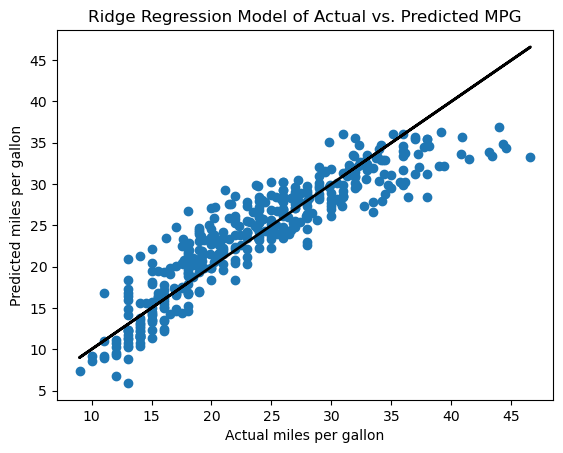

In [62]:
# The other regression model I have chosen to work with is a ridge regression model, as it allows for smooth data while 
# handling overfitting of the data. I will be importing Ridge from Sci-kitlearn's linear_model class.

from sklearn.linear_model import Ridge

# Now to execute the same code as the previous two steps with the model type changed to ridge will simply require the model 
# to be changed to Ridge().

ridge_model = Ridge()

ridge_model.fit(train_set_rows, train_set_cols)

ridge_predictions = ridge_model.predict(auto_predictor_var)

plt.scatter(auto_outcome_var, ridge_predictions)
plt.plot(auto_outcome_var, auto_outcome_var, color='black', linestyle='-', linewidth=2)
plt.xlabel('Actual miles per gallon')
plt.ylabel('Predicted miles per gallon')
plt.title('Ridge Regression Model of Actual vs. Predicted MPG')
plt.show()

In [63]:
# Statistical values for Ridge model training dataset

ridge_model = Ridge()

ridge_model.fit(train_set_rows, train_set_cols)

# This block of code is for the training dataset values that are printed at the end.

ridge_train_set_pred = ridge_model.predict(train_set_rows)

ridge_r2_train_value = r2_score(train_set_cols, ridge_train_set_pred)

ridge_rmse_train_value = np.sqrt(mean_squared_error(train_set_cols, ridge_train_set_pred))

ridge_mae_train_value = mean_absolute_error(train_set_cols, ridge_train_set_pred)

print('Ridge regression model training dataset statistical values')
print('R-squared:', ridge_r2_train_value)
print('Root Mean Squared Error:', ridge_rmse_train_value)
print('Mean Absolute Error:', ridge_mae_train_value)

Ridge regression model training dataset statistical values
R-squared: 0.8334798128510696
Root Mean Squared Error: 3.201224051735744
Mean Absolute Error: 2.438548747667067


In [61]:
# Statistical values for Ridge model test dataset

ridge_test_set_pred = ridge_model.predict(test_set_rows)

ridge_r2_test_value = r2_score(test_set_cols, ridge_test_set_pred)

ridge_rmse_test_value = np.sqrt(mean_squared_error(test_set_cols, ridge_test_set_pred))

ridge_mae_test_value = mean_absolute_error(test_set_cols, ridge_test_set_pred)

print('Test dataset statistical values:')
print('R-squared:', ridge_r2_test_value)
print('Root Mean Squared Error:', ridge_rmse_test_value)
print('Mean Absolute Error:', ridge_mae_test_value)

Test dataset statistical values:
R-squared: 0.7733847840113237
Root Mean Squared Error: 3.6355836452582335
Mean Absolute Error: 2.8790649317687786


In [ ]:
# Looking at the results from these ridge regression model statistic computations, here is what I see:

# R-Squared: As this metric measures the degree of best fit the model demonstrates for the data and is scaled from 0 to 1, 
# with 0 being the worst fit for the data and 1 being a perfect fit, the values of 0.83 for the training data and 0.77 for 
# the test data show that the model is a good fit for the data. 

# Root Mean Squared Error: 3.2 and 3.63 for the training and test data respectively is relatively good, as low numbers 
# translate to better model accuracy and smaller errors in its predictions.The scale of the value is relative to the 
# outcome variable (mpg in our case), so the values presented here support R-Squared in revealing that the model is a good 
# fit for the data.

# Mean Absolute Error: With the training data yielding a value of 2.43 and the test data showing 2.87, and the scale also 
# being relative to the mpg variable, these metrics also support the assumption of good fit to the data from the model. Low 
# values assert the presence of lower prediction errors on average.